In [1]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.fftpack as fft
import scipy.signal as sig
import scipy.integrate as integ
import numpy.random as rd
import sklearn.linear_model as skl
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["text.usetex"] = True
mp.rcParams["figure.figsize"] = (5*16/9, 5)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["font.family"] = "serif"
rd.seed(314159)

In [4]:
samprate, samp = wav.read("RSCS-5/test123_44.1kHz.wav")

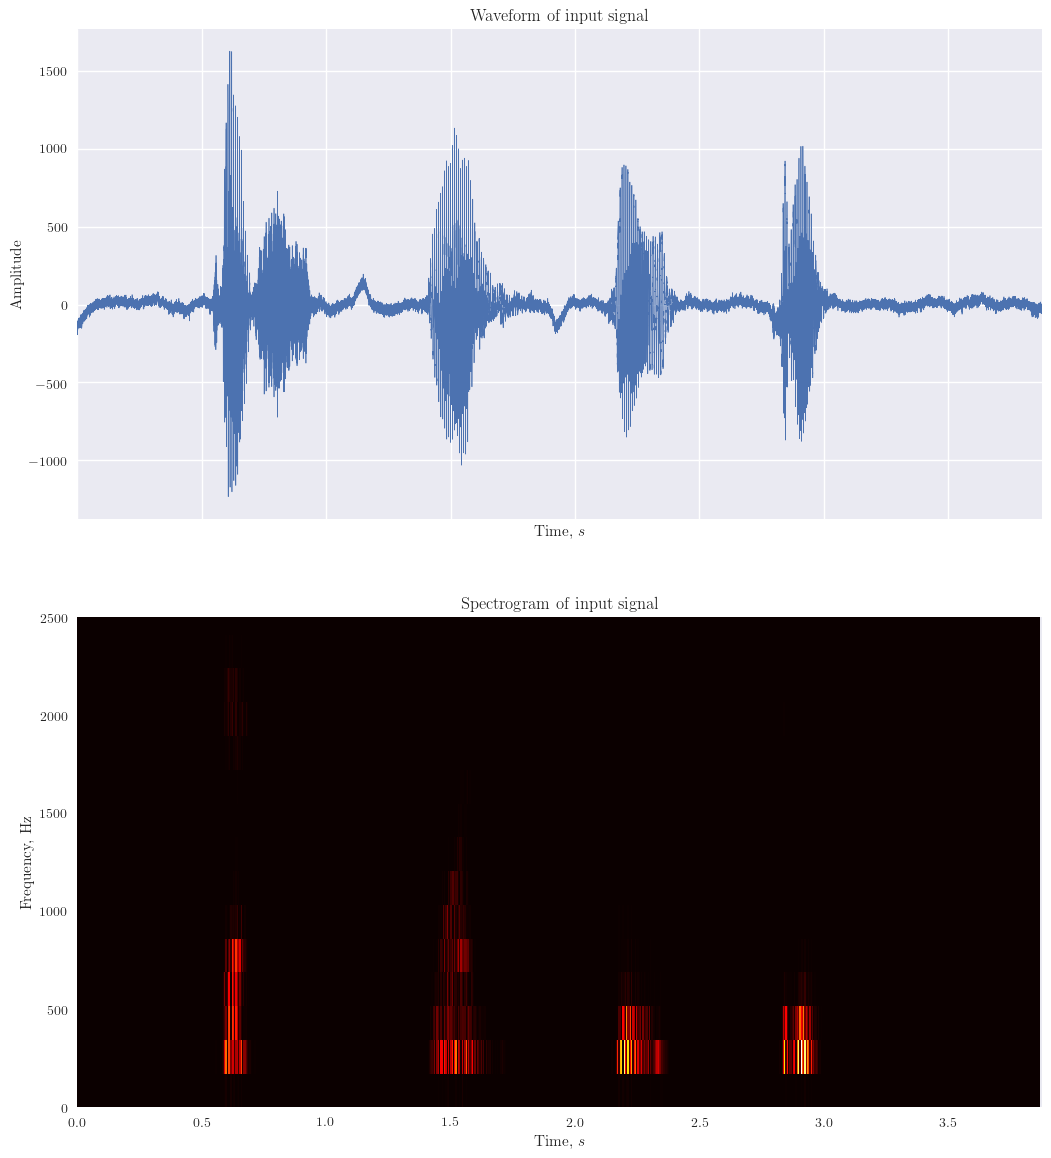

In [5]:
fig,(ax1,ax2) = mp.subplots(nrows=2, sharex=True, figsize=(7*16/9,7*2))
t = np.linspace(0,len(samp)/samprate,len(samp))
ax1.plot(t,samp, lw=0.5)
ax1.set_xlabel(r"\textrm{Time, $s$}")
ax1.set_ylabel(r"\textrm{Amplitude}")
ax1.set_title(r"\textrm{Waveform of input signal}")
ax1.set_xlim(0,len(samp)/samprate)
ax1.grid(True)

f,t,Sxx = sig.spectrogram(samp,samprate)
ax2.pcolormesh(t,f,Sxx, cmap="hot")
ax2.set_ylabel(r"\textrm{Frequency, Hz}")
ax2.set_xlabel(r"\textrm{Time, $s$}")
ax2.set_title(r"\textrm{Spectrogram of input signal}")
ax2.set_ylim(0,2500)

mp.show()

In [6]:
N = len(samp)//8
init = 0
dur = 1
sec = 200
t = np.linspace(init/sec,dur/sec,N)
frac = 0.03
M = np.round(N*frac).astype(int)

In [7]:
yi = rd.randint(0,N,M)
yi = np.sort(yi)
y = samp[yi]
t = np.linspace(0,len(samp)/samprate,len(samp))
ty = t[yi]

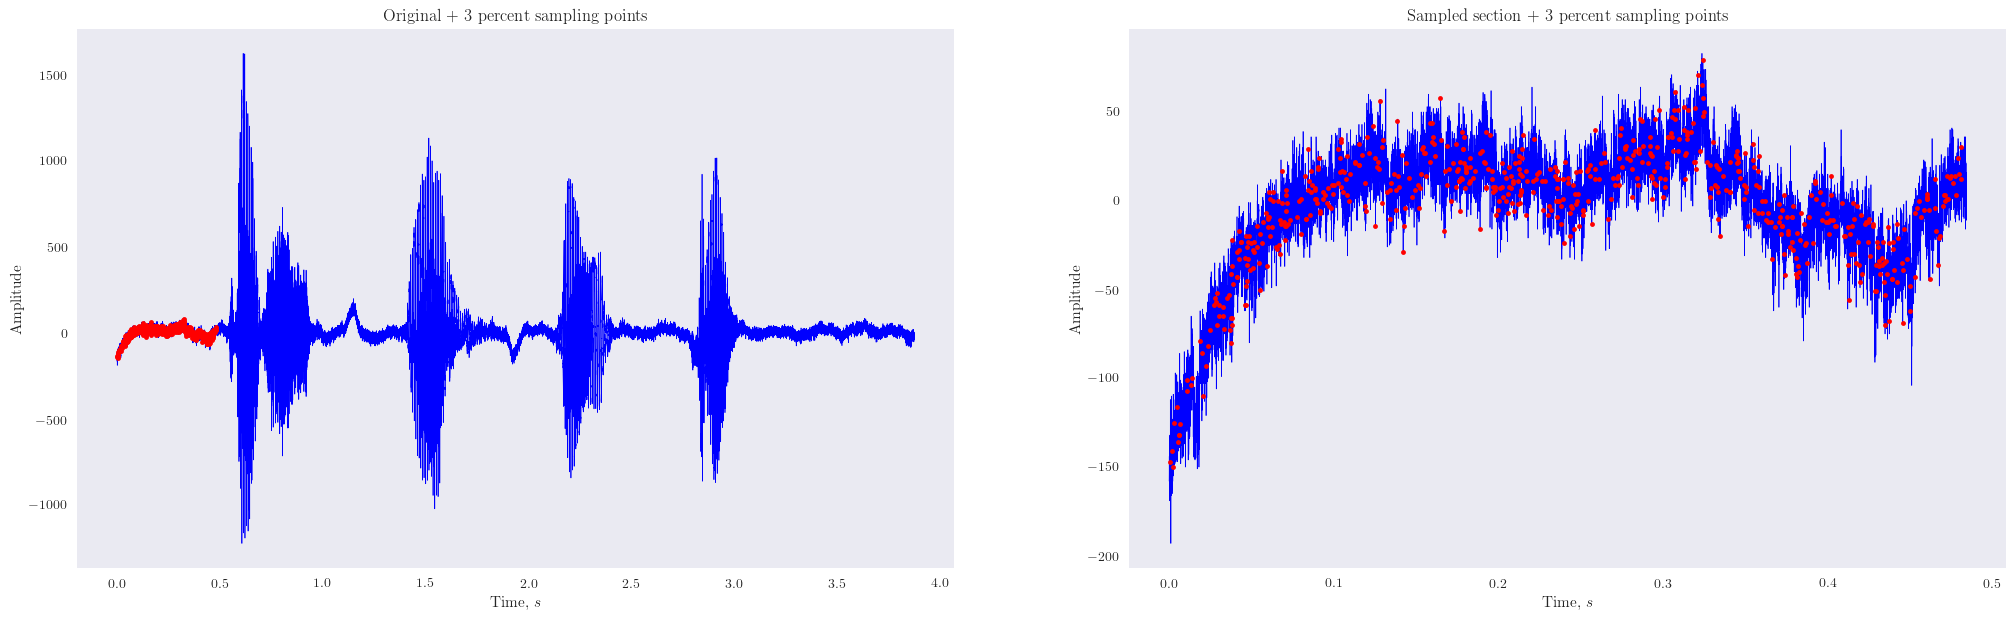

In [8]:
fig,(ax1,ax2) = mp.subplots(ncols=2, figsize=(7*2*16/9,7))

ax1.plot(t,samp, "b-", lw=0.5)
ax1.plot(ty,y, "r.")
ax1.set_xlabel(r"\textrm{Time, $s$}")
ax1.set_ylabel(r"\textrm{Amplitude}")
ax1.set_title(r"\textrm{Original $+$ %i percent sampling points}"%(int(frac*100)))
ax1.grid()

ax2.plot(t[:N],samp[:N], "b-", lw=0.5)
ax2.plot(ty,y, "r.")
ax2.set_xlabel(r"\textrm{Time, $s$}")
ax2.set_ylabel(r"\textrm{Amplitude}")
ax2.set_title(r"\textrm{Sampled section $+$ %i percent sampling points}"%(int(frac*100)))
ax2.grid()

mp.show()

In [9]:
print("Total number of samples = %i"%(len(samp)))
print("Original subsamples = %i"%(N))
print("Compressed samples = %i"%(len(yi)))
print("Compression ratio = %.3f percent"%(M/N*100))

Total number of samples = 170907
Original subsamples = 21363
Compressed samples = 641
Compression ratio = 3.001 percent


In [ ]:
d = np.identity(N)
d = fft.dct(d)
A = d[yi]

In [40]:
#L1 optimization using CVX ECOS
lasso = skl.Lasso(alpha=1.0)
lasso.fit(A,y)
x_las = fft.idct(lasso.coef_)